# Dropout Regularization

It's a little non-intuitive, but sometimes throwing data away during training produces better results!

That's because we're not throwing it away entirely, but hiding a random portion of the data at each training step. That helps to prevent overfitting, and forces the neural network to spread out its learning over more of its neurons.

Let's see it in action. We'll use scikit_learn's make_classification function to randomly create a clustering problem with 4 classes, and 1000 samples:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ipykernel import kernelapp as app


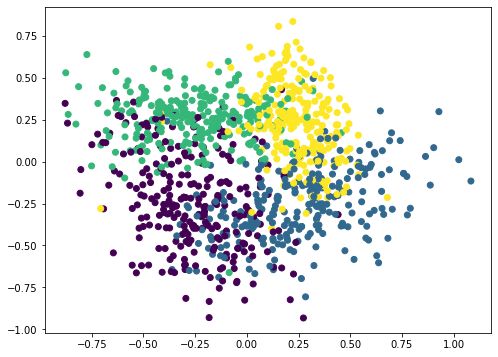

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

from sklearn.datasets import make_classification

X, y = make_classification(n_features=2, n_classes=4, n_samples=1000, n_redundant=0, n_informative=2,
                           random_state=47, n_clusters_per_class=1, scale=0.25)

from pylab import *

plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1], c=y.astype(np.float))
plt.show()

As we did before, we'll use the to_categorical function to "one-hot encode" our label data, and then produce a random train/test split of the resulting dataset:

In [2]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split

y = keras.utils.to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Now, let's set up a deep neural network without any dropout layers, and see how it does:

In [3]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=X_train.shape[1:]))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
          
print(model.summary())

history = model.fit(X_train, y_train,
                    batch_size=100,
                    epochs=100,
                    verbose=2,
                    validation_data=(X_test, y_test))

scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                48        
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
Total params: 220
Trainable params: 220
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
8/8 - 1s - loss: 1.3929 - accuracy: 0.1013 - val_loss: 1.3831 - val_accuracy: 0.1100 - 1s/epoch - 157ms/step
Epoch 2/100
8/8 - 0s - loss: 1.3816 - accuracy: 0.1300 - val_loss: 1.3730 - val_accuracy: 0.1750 - 37ms/epoch - 5ms/step
Epoch 3/100
8/8 - 0s - loss: 1.3713 - accuracy: 0.2463 - val_loss: 1.3636 -

Note the final accuracy we ended up with at the end there. We ran this for 100 epochs, because we wanted to give our model ample time to start overfitting to the data.

Now, let's set up the same deep neural network, but with a 20% droput layer in between each hidden layer:

In [4]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=X_train.shape[1:]))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
          
print(model.summary())

history = model.fit(X_train, y_train,
                    batch_size=100,
                    epochs=100,
                    verbose=2,
                    validation_data=(X_test, y_test))

scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                48        
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_5 (Dense)             (None, 4)                 36        
                                                                 
Total params: 220
Trainable params: 220
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
8/8 - 2s - loss: 1.3836 - accuracy: 0.2

It performed a little bit better! Perhaps we were in fact overfitting to the training data before, and the dropout layers helped to prevent that.